In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import tree
from IPython.display import SVG,display

In [3]:
file= pd.read_csv("Advertising.csv")

In [4]:
file.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
file.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
file.shape

(200, 5)

In [8]:
file.duplicated().sum()

0

In [9]:
file.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [10]:
file.nunique().sum()

850

In [20]:
file.drop(["Unnamed: 0"],axis=1,inplace = True)

In [22]:
file.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


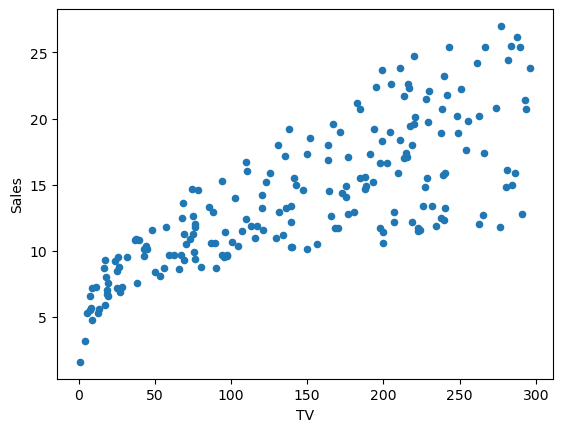

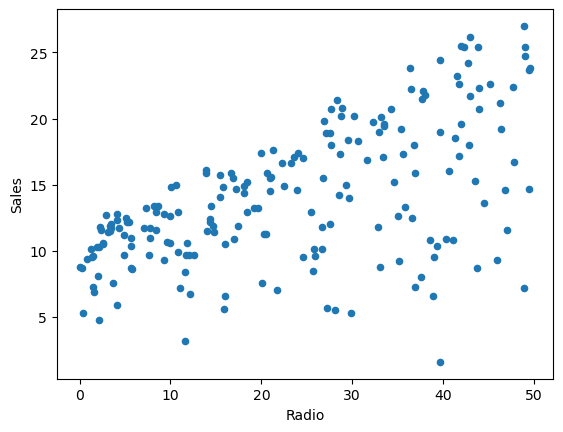

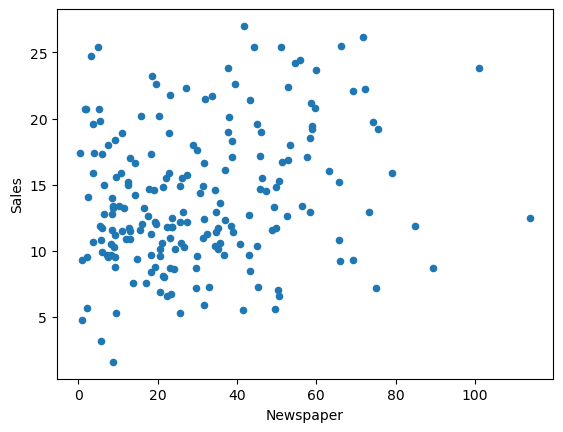

In [28]:
# Scatter plot for all expenses
file.plot(kind="scatter", x='TV', y='Sales')
file.plot(kind="scatter", x='Radio', y='Sales')
file.plot(kind="scatter", x='Newspaper', y='Sales')

plt.show()

As we can see sales increase for TV and Radio if we increase Advertising expenses 
Radio and Newspaper both have outliers but the Newspaper are in extreme

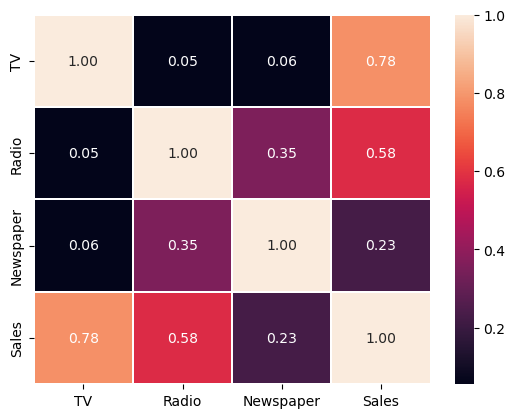

In [31]:
sns.heatmap(file.corr(), annot=True, linewidths=0.1, fmt='.2f')
plt.show()

# Data Pre processing

In [36]:
file = file[file['Newspaper'].le(90)]

In [40]:
#selcting feature
features = [i for i in file.columns if i != 'Sales']

In [46]:
def calc_vif(X):
    return pd.DataFrame({
        'variables': X.columns,
        'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    })


In [50]:
cn_var = ['TV', 'Radio', 'Newspaper']
cn_var_file = pd.DataFrame(file[cn_var])
cn_var_file

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [52]:
#now using cn_var we will calulate vif of dataset
calc_vif(file[[i for i in cn_var_file]])

,variables,VIF
0,TV,2.502183
1,Radio,3.275285
2,Newspaper,3.126386


In [56]:
file.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Data Scaling  

In [59]:
features = [i for i in file.columns if i not in ['Sales']]
scaler = StandardScaler()
X = scaler.fit_transform(file[features])

# Modeltraining 

In [66]:
dpnd_var = ['Sales']
X = file.drop('Sales',axis=1)
y = file[dpnd_var]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Checking the train distribution of dependent variable
y_train.value_counts()


Sales
9.7      4
15.9     3
20.7     3
12.2     3
11.8     3
        ..
12.4     1
12.3     1
11.2     1
10.9     1
27.0     1
Name: count, Length: 109, dtype: int64

In [70]:
def evaluate_model(model, X_train, y_train, X_test, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2_train = r2_score(y_train, model.predict(X_train))
    r2 = r2_score(y_test, y_pred)
    r2_adjusted = 1 - (1 - r2) * ((len(X_test) - 1) / (len(X_test) - X_test.shape[1] - 1))
    
    print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}, Train R2: {r2_train}, Test R2: {r2}, Adjusted R2: {r2_adjusted}")
    
    return [mse, rmse, mae, r2_train, r2, r2_adjusted]

In [72]:
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

In [74]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_li = reg.predict(X_test)

In [80]:
linear_score = evaluate_model(reg, X_train, y_train, X_test, y_test, y_pred_li)
score['Linear regression'] = linear_score
score['Linear regression'] = linear_score

MSE: 2.432076682469541, RMSE: 1.5595116807736775, MAE: 1.177152628314206, Train R2: 0.8898322019518987, Test R2: 0.9098946359000558, Adjusted R2: 0.9023858555583938


In [82]:
score

,Linear regression
MSE,2.432077
RMSE,1.559512
MAE,1.177153
Train R2,0.889832
Test R2,0.909895
Adjusted R2,0.902386


In [98]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train.values.ravel())
y_pred_rf1 = rf.predict(X_test)

In [100]:
result = evaluate_model(rf, X_train, y_train, X_test, y_test, y_pred_rf1)
score['Random Forest'] = result


MSE: 0.5616389749999968, RMSE: 0.7494257635016272, MAE: 0.6089249999999964, Train R2: 0.9969553082289084, Test R2: 0.9791919865438996, Adjusted R2: 0.9774579854225579


In [102]:
score

,Linear regression,Random forest,Random Forest
MSE,2.432077,2.432077,0.561639
RMSE,1.559512,1.559512,0.749426
MAE,1.177153,1.177153,0.608925
Train R2,0.889832,0.889832,0.996955
Test R2,0.909895,0.909895,0.979192
Adjusted R2,0.902386,0.902386,0.977458


In [106]:
gb = GradientBoostingRegressor(random_state=0)
gb.fit(X_train, y_train.values.ravel())
y_pred_gb1 = gb.predict(X_test)

In [108]:
result = evaluate_model(gb, X_train, y_train, X_test, y_test, y_pred_gb1)
score['Gradient Boosting Regressor'] = result

MSE: 0.5086577159560701, RMSE: 0.7132024368691333, MAE: 0.551203372774336, Train R2: 0.9987323273593703, Test R2: 0.9811548751612844, Adjusted R2: 0.9795844480913914


In [120]:
score

,Linear regression,Random Forest,Gradient Boosting Regressor
MSE,2.432077,0.561639,0.508658
RMSE,1.559512,0.749426,0.713202
MAE,1.177153,0.608925,0.551203
Train R2,0.889832,0.996955,0.998732
Test R2,0.909895,0.979192,0.981155
Adjusted R2,0.902386,0.977458,0.979584


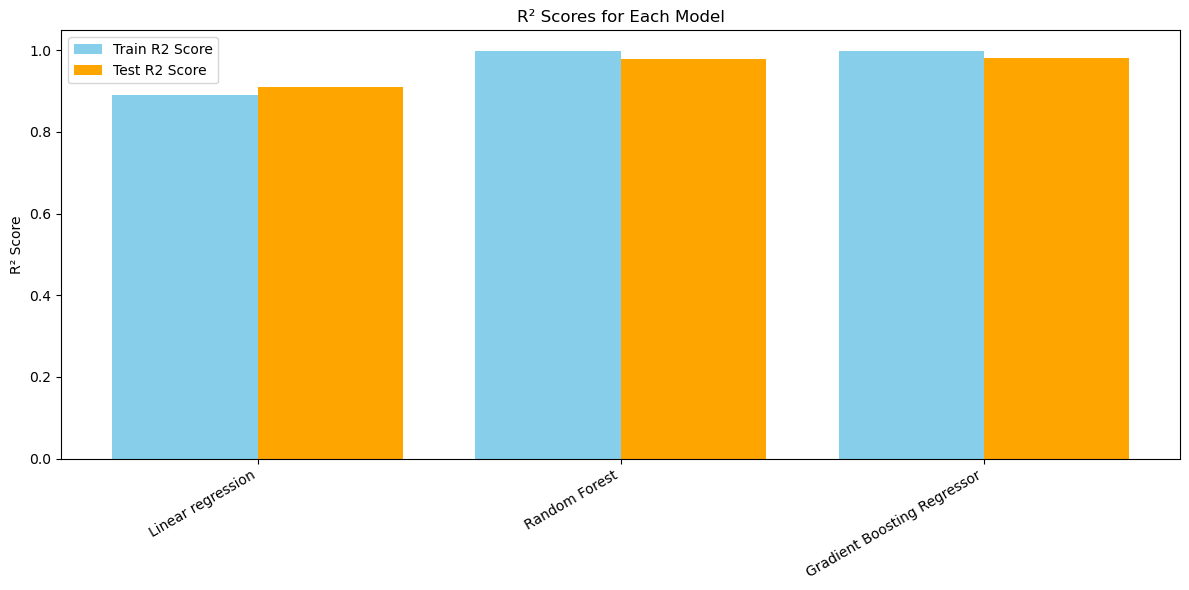

In [123]:

models = list(score.columns)
train = score.iloc[-3, :]  
test = score.iloc[-2, :] 
X_axis = np.arange(len(models))  
plt.figure(figsize=(12, 6))   
plt.bar(X_axis - 0.2, train, 0.4, label='Train R2 Score', color='skyblue')
plt.bar(X_axis + 0.2, test, 0.4, label='Test R2 Score', color='orange')
plt.xticks(X_axis, models, rotation=30, ha='right')
plt.ylabel("R² Score")
plt.title("R² Scores for Each Model")
plt.legend()
plt.tight_layout()
plt.show()


In [125]:
score_t = score.transpose()
remove_models = score_t[score_t['Train R2']==1].index
remove_models

adj = score_t.drop(remove_models)               
adj

,MSE,RMSE,MAE,Train R2,Test R2,Adjusted R2
Linear regression,2.432077,1.559512,1.177153,0.889832,0.909895,0.902386
Random Forest,0.561639,0.749426,0.608925,0.996955,0.979192,0.977458
Gradient Boosting Regressor,0.508658,0.713202,0.551203,0.998732,0.981155,0.979584


In [137]:
#choosithe best model ng 
def select_best_model(df, metrics):
    best_models = {}
    for metric in metrics:
        max_test = df['Test ' + metric].max()
        best_model_test = df[df['Test ' + metric] == max_test].index[0]
        best_models[metric] = best_model_test
    return best_models
metrics = ['R2']
best_model = select_best_model(adj, metrics)

print("The best model is:")
for metric, best_model_name in best_model.items():
    print(f"{metric}: {best_model_name} - {adj['Test ' + metric][best_model_name].round(4)}")
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Train R2'] == 1].index
new_score = score_smpl.drop(remove_overfitting_models)



The best model is:
R2: Gradient Boosting Regressor - 0.9812


In [139]:
# Save the model to a pickle file
import pickle
with open("gradient_boosting_regression_model.pkl", "wb") as f:
  pickle.dump(gb, f)